In [1]:
%load_ext autoreload
%autoreload 2
from trashnet.data.constants import *
from torch.optim import Adam
from dataloader import TrashNetDataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from matplotlib import pyplot as plt
from torchvision.models.densenet import densenet161
from training_utils import *
import torch

Creating the datasets

In [2]:
trashset = TrashNetDataset("trashnet/data/dataset-resized")
# trashloader = DataLoader(trashset, batch_size = 10, shuffle=True)
valsize = int(len(trashset) * 0.05)
trainsize = int(len(trashset) * 0.05)
testsize = len(trashset) - valsize - trainsize
train_dataset, val_dataset, test_dataset = random_split(trashset, [trainsize, valsize, testsize])

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8)
val_dataloader = DataLoader(val_dataset, batch_size=8)

Visualizing some samples

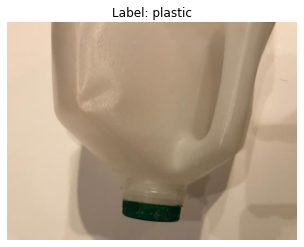

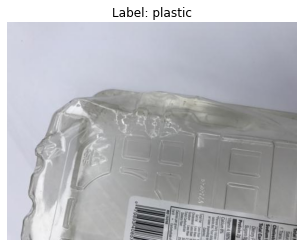

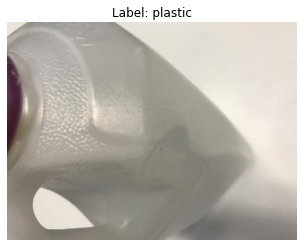

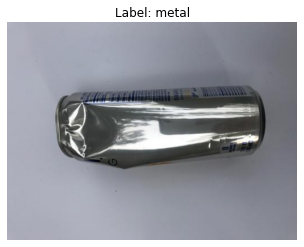

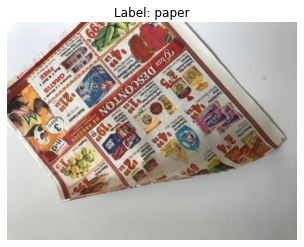

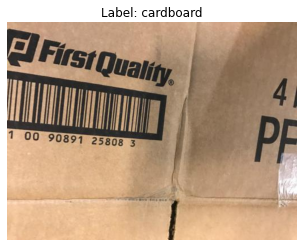

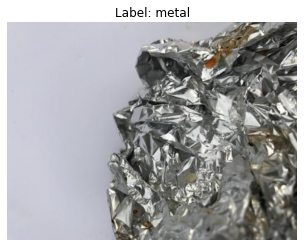

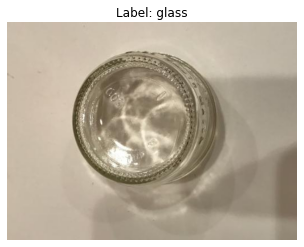

In [3]:
x,y = next(iter(train_dataloader))
for ix in range(len(x)):
    plt.axis("off")
    plt.imshow(x[ix])
    plt.title(f"Label: {CLASSES[y[ix].item()]}")

    plt.show()

Initializing the model and optomizer

In [3]:
model = densenet161(pretrained=True)
model.device = 'cuda'
model.classifier = torch.nn.Linear(2208, len(CLASSES), bias=True)
opt = Adam(model.parameters())
loss = torch.nn.CrossEntropyLoss()

Training the model

In [4]:
train_model(model, train_dataloader, val_dataloader, opt, 1)

Epoch  0  Loss:  1.864409327507019
Epoch  0  Acc:  0.25
Epoch  0  Loss:  1.457096815109253
Epoch  0  Acc:  0.375
Epoch  0  Loss:  1.519375205039978
Epoch  0  Acc:  0.375
Epoch  0  Loss:  1.1112594604492188
Epoch  0  Acc:  0.5
Epoch  0  Loss:  2.3175487518310547
Epoch  0  Acc:  0.625
Epoch  0  Loss:  1.2696762084960938
Epoch  0  Acc:  0.625
Epoch  0  Loss:  1.6273298263549805
Epoch  0  Acc:  0.375
Epoch  0  Loss:  1.6249566078186035
Epoch  0  Acc:  0.5
Epoch  0  Loss:  1.0301920175552368
Epoch  0  Acc:  0.25
Epoch  0  Loss:  1.379287600517273
Epoch  0  Acc:  0.25
Epoch  0  Loss:  2.2245678901672363
Epoch  0  Acc:  0.375
Epoch  0  Loss:  2.1784822940826416
Epoch  0  Acc:  0.5
Epoch  0  Loss:  1.608944296836853
Epoch  0  Acc:  0.5
Epoch  0  Loss:  1.7079949378967285
Epoch  0  Acc:  0.25
Epoch  0  Loss:  1.3052847385406494
Epoch  0  Acc:  0.25
Epoch  0  Loss:  1.8661938905715942
Epoch  0  Acc:  0.125



([1.864409327507019,
  1.457096815109253,
  1.519375205039978,
  1.1112594604492188,
  2.3175487518310547,
  1.2696762084960938,
  1.6273298263549805,
  1.6249566078186035,
  1.0301920175552368,
  1.379287600517273,
  2.2245678901672363,
  2.1784822940826416,
  1.608944296836853,
  1.7079949378967285,
  1.3052847385406494,
  1.8661938905715942],
 [0.25,
  0.375,
  0.375,
  0.5,
  0.625,
  0.625,
  0.375,
  0.5,
  0.25,
  0.25,
  0.375,
  0.5,
  0.5,
  0.25,
  0.25,
  0.125])